In [1]:
import pandas as pf
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull

import warnings
warnings.filterwarnings("ignore")

from xaimoo.utilities.data import label_vehicle_crash, label_two_bar_truss, label_welded_beam
from xaimoo.utilities.visualize import plot_rule_explanations
from xaimoo.explanations.rules import train_skope_rules, explain_skope_rules, train_rulefit_rules, explain_rulefit_rules, rule_to_conditions, index_rules

## Vehicle crash worthiness

In [11]:
df_crash, var_names, obj_names = label_vehicle_crash("../data/VehicleCrash.csv")

target_category = 3

skope_kwargs = {"max_depth": range(1, len(var_names)+1), "precision_min": 0.7, "recall_min": 0.95}
classifier = train_skope_rules(df_crash, var_names, target_category, classifier_kwargs=skope_kwargs)
rules = index_rules(explain_skope_rules(classifier))

Rule --> (Accuracy, Recall)
x1 <= 2.92059 and x3 <= 2.0582 and x4 > 2.43252 --> (0.9803921568627451, 0.9554140127388535)
x1 <= 2.91837 and x3 <= 2.15687 and x4 > 2.43263 --> (0.9779005524861878, 0.9567567567567568)
x3 <= 2.15687 and x4 > 2.42762 --> (0.9461077844311377, 0.9575757575757575)
x4 > 2.42762 and x5 <= 2.40915 --> (0.8074866310160428, 0.9741935483870968)


In [12]:
rule = rules[0][0]

In [13]:
con = rule_to_conditions(rule)
df_crash["skope_mark"] = df_crash.apply(con, axis=1)

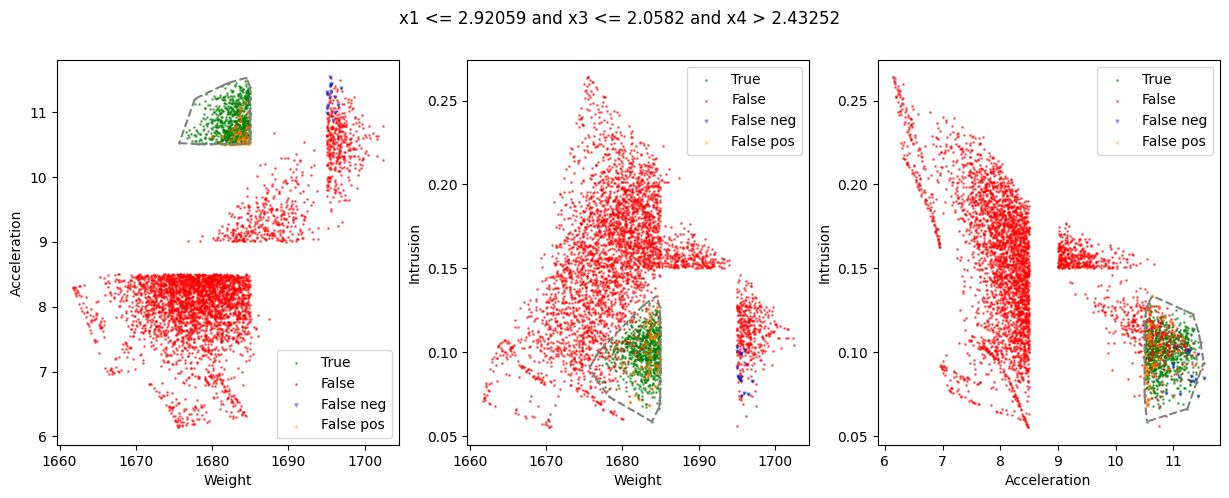

In [14]:
plot_rule_explanations(df_crash, obj_names, "skope_mark", "category", target_category, title=rule)